<a href="https://colab.research.google.com/github/freddyambia/Data-Science-I/blob/master/Python__Regresion_lineal_01_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTACION DE BIBLIOTECAS/LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.metrics import confusion_matrix


CARGA DE DATOS

In [ ]:
df_original = pd.read_csv("Carpeta_Data_3/Precioscasas.csv", sep = ";")
df_copia = pd.read_csv("Carpeta_Data_3/Precioscasas.csv", sep = ";")

In [ ]:
df_original.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2/05/14 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2/05/14 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2/05/14 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2/05/14 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2/05/14 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


COMPRENDIENDO DATOS

In [ ]:
df_original.shape

(4600, 18)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df_original.size

82800

In [ ]:
df_original.index

RangeIndex(start=0, stop=4600, step=1)

In [ ]:
df_original.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

RESUMEN DESCRIPTIVO

In [ ]:
df_original.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df_original.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df_original.min()

date             1/06/14 00:00
price                        0
bedrooms                     0
bathrooms                    0
sqft_living                370
sqft_lot                   638
floors                       1
waterfront                   0
view                         0
condition                    1
sqft_above                 370
sqft_basement                0
yr_built                  1900
yr_renovated                 0
street            1 View Ln NE
city                    Algona
statezip              WA 98001
country                    USA
dtype: object

ANALISIS DE VARIABLES

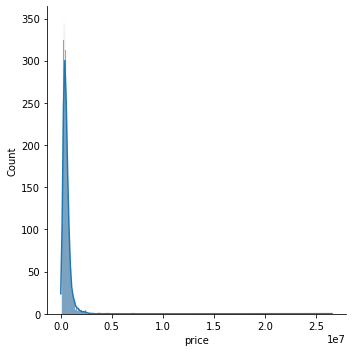

In [ ]:
sns.displot(data=df_original, x="price", kde=True)

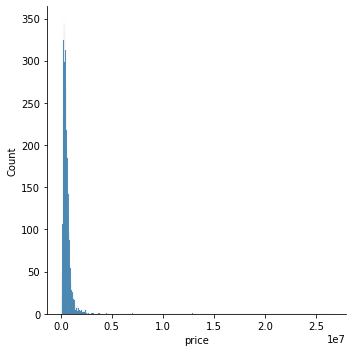

In [ ]:
sns.displot(data=df_original, x="price", kde=False)

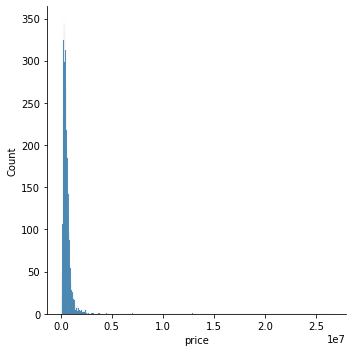

In [ ]:
sns.displot(data=df_original, x="price")

In [ ]:
df_copia.loc[df_copia["price"] <= 1500000].count()

date             4484
price            4484
bedrooms         4484
bathrooms        4484
sqft_living      4484
sqft_lot         4484
floors           4484
waterfront       4484
view             4484
condition        4484
sqft_above       4484
sqft_basement    4484
yr_built         4484
yr_renovated     4484
street           4484
city             4484
statezip         4484
country          4484
dtype: int64

In [ ]:
df_cleaned = df_copia.loc[(df_copia["price"] > 0) & (df_copia["price"] <= 1500000)]

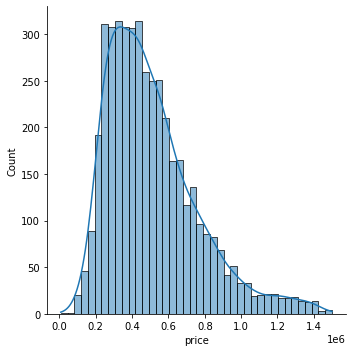

In [ ]:
sns.displot(data=df_cleaned, x="price", kde=True)

In [ ]:
df_cleaned_2 = df_cleaned.loc[(df_cleaned["sqft_lot"] <= 50000)]

Diagrama de dispersión

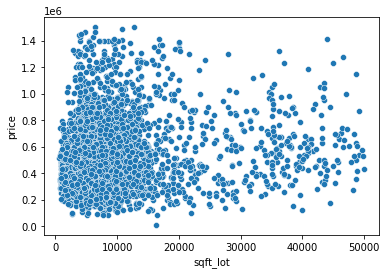

In [ ]:
sns.scatterplot(data=df_cleaned_2, x="sqft_lot", y="price")

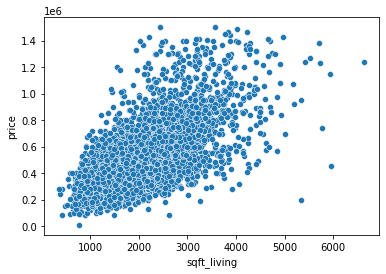

In [ ]:
sns.scatterplot(data=df_cleaned_2, x="sqft_living", y="price")

Mapa de calor

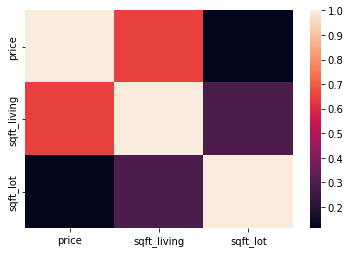

In [ ]:
sns.heatmap(df_cleaned_2[["price","sqft_living","sqft_lot"]].corr());

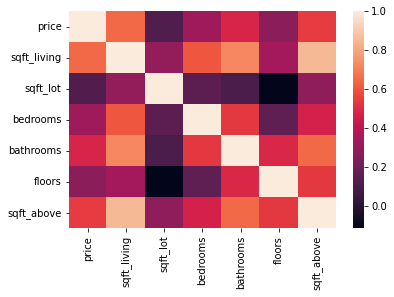

In [ ]:
sns.heatmap(df_cleaned_2[["price","sqft_living","sqft_lot","bedrooms","bathrooms","floors","sqft_above"]].corr())

REGRESION LINEAL 

In [ ]:
import statsmodels.api as sm

y_train = df_cleaned_2["price"]
X_train = df_cleaned_2[["sqft_living","bathrooms","sqft_above"]] 
X_train = sm.add_constant(X_train)

# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     1031.
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        06:40:46   Log-Likelihood:                -57810.
No. Observations:                4259   AIC:                         1.156e+05
Df Residuals:                    4255   BIC:                         1.157e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.514e+04   9106.389     10.447      